In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import chi2_contingency

## Load Data

In [2]:
file_path = "./data/CDB THN 2021-2024.csv"
df_cdb = pd.read_csv(file_path)
df_cdb["Tgl. Mohon"] = pd.to_datetime(df_cdb["Tgl. Mohon"], format="%d/%m/%Y")
df_cdb["Tgl. Lahir"] = pd.to_datetime(df_cdb["Tgl. Lahir"], format="%d/%m/%Y")
df_cdb

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus
0,2021-01-02,MULKAN,JL AL MAKMUR I,DAMAI,BALIKPAPAN KOTA,LAKI-LAKI,1996-08-18,Wiraswasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTP/SMP,LD0
1,2021-01-02,HANIE ZULFA NABIELA,JL MT HARYONO PERUM GRAND CITY,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,2003-04-14,Pegawai Swasta-Jasa,"< Rp. 900.000,-",AKADEMI/DIPLOMA,LP0
2,2021-01-02,HASANA PUTRI,JL LETJEND S PARMAN,SUMBER REJO,BALIKPAPAN TENGAH,PEREMPUAN,1997-02-13,Pegawai Swasta-Pertanian,"Rp. 900.001,- s/d Rp. 1.250.000,-",SARJANA,LPA
3,2021-01-02,SUSARI HATI,JL MARSMA R ISWAHYUDI,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,1982-11-16,Pegawai Swasta-Industri,"Rp. 4.000.001,- s/d Rp. 6.000.000,-",SLTA/SMU,LP0
4,2021-01-02,ROY KILAPONG,JL MT HARYONO,DAMAI BAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,1976-01-17,Pegawai Swasta-Jasa,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,LPA
...,...,...,...,...,...,...,...,...,...,...,...
6852,2024-08-31,RUDI AMSA,JL PADAT KARYA,MANGGAR,BALIKPAPAN TIMUR,LAKI-LAKI,2004-11-06,Pegawai Swasta-Jasa,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,MM0
6853,2024-08-31,MARIATI,JL. TAMAN BUKIT SARI,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,1978-03-21,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,MM0
6854,2024-08-31,JAMES HAROL SELA,JL. LETJEND. S. PARMAN,GUNUNGSARI ULU,BALIKPAPAN TENGAH,LAKI-LAKI,1961-01-19,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SARJANA,LP3
6855,2024-08-31,GOMGOM RAULI SIHOMBING,PERUM BDS II,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,1980-04-30,IBU RUMAH TANGGA,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,ML0


## Prep

In [3]:
df_cdb_with_initial = df_cdb.copy()
df_cdb_with_initial["initial Varian Plus"] = df_cdb_with_initial["Varian Plus"].apply(lambda x: x[0])
df_cdb_with_initial

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus
0,2021-01-02,MULKAN,JL AL MAKMUR I,DAMAI,BALIKPAPAN KOTA,LAKI-LAKI,1996-08-18,Wiraswasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTP/SMP,LD0,L
1,2021-01-02,HANIE ZULFA NABIELA,JL MT HARYONO PERUM GRAND CITY,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,2003-04-14,Pegawai Swasta-Jasa,"< Rp. 900.000,-",AKADEMI/DIPLOMA,LP0,L
2,2021-01-02,HASANA PUTRI,JL LETJEND S PARMAN,SUMBER REJO,BALIKPAPAN TENGAH,PEREMPUAN,1997-02-13,Pegawai Swasta-Pertanian,"Rp. 900.001,- s/d Rp. 1.250.000,-",SARJANA,LPA,L
3,2021-01-02,SUSARI HATI,JL MARSMA R ISWAHYUDI,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,1982-11-16,Pegawai Swasta-Industri,"Rp. 4.000.001,- s/d Rp. 6.000.000,-",SLTA/SMU,LP0,L
4,2021-01-02,ROY KILAPONG,JL MT HARYONO,DAMAI BAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,1976-01-17,Pegawai Swasta-Jasa,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,LPA,L
...,...,...,...,...,...,...,...,...,...,...,...,...
6852,2024-08-31,RUDI AMSA,JL PADAT KARYA,MANGGAR,BALIKPAPAN TIMUR,LAKI-LAKI,2004-11-06,Pegawai Swasta-Jasa,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,MM0,M
6853,2024-08-31,MARIATI,JL. TAMAN BUKIT SARI,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,1978-03-21,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,MM0,M
6854,2024-08-31,JAMES HAROL SELA,JL. LETJEND. S. PARMAN,GUNUNGSARI ULU,BALIKPAPAN TENGAH,LAKI-LAKI,1961-01-19,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SARJANA,LP3,L
6855,2024-08-31,GOMGOM RAULI SIHOMBING,PERUM BDS II,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,1980-04-30,IBU RUMAH TANGGA,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,ML0,M


In [4]:
df_cdb_with_tipe = df_cdb_with_initial.copy()
def tipe_customer(row):
    if row[["Gender", "Tgl. Lahir", "Pekerjaan", "Pengeluaran", "Pendidikan"]].isnull().any():
        return "INSTANSI LUAR"
    else:
        return "INDIVIDU"

df_cdb_with_tipe["Tipe Pembeli"] = df_cdb_with_tipe.apply(tipe_customer, axis=1)
df_cdb_with_tipe["Umur"] = (pd.to_datetime("today") - df_cdb_with_tipe["Tgl. Lahir"]).dt.days // 365

df_cdb_with_tipe

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus,Tipe Pembeli,Umur
0,2021-01-02,MULKAN,JL AL MAKMUR I,DAMAI,BALIKPAPAN KOTA,LAKI-LAKI,1996-08-18,Wiraswasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTP/SMP,LD0,L,INDIVIDU,28
1,2021-01-02,HANIE ZULFA NABIELA,JL MT HARYONO PERUM GRAND CITY,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,2003-04-14,Pegawai Swasta-Jasa,"< Rp. 900.000,-",AKADEMI/DIPLOMA,LP0,L,INDIVIDU,22
2,2021-01-02,HASANA PUTRI,JL LETJEND S PARMAN,SUMBER REJO,BALIKPAPAN TENGAH,PEREMPUAN,1997-02-13,Pegawai Swasta-Pertanian,"Rp. 900.001,- s/d Rp. 1.250.000,-",SARJANA,LPA,L,INDIVIDU,28
3,2021-01-02,SUSARI HATI,JL MARSMA R ISWAHYUDI,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,1982-11-16,Pegawai Swasta-Industri,"Rp. 4.000.001,- s/d Rp. 6.000.000,-",SLTA/SMU,LP0,L,INDIVIDU,42
4,2021-01-02,ROY KILAPONG,JL MT HARYONO,DAMAI BAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,1976-01-17,Pegawai Swasta-Jasa,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,LPA,L,INDIVIDU,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6852,2024-08-31,RUDI AMSA,JL PADAT KARYA,MANGGAR,BALIKPAPAN TIMUR,LAKI-LAKI,2004-11-06,Pegawai Swasta-Jasa,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,MM0,M,INDIVIDU,20
6853,2024-08-31,MARIATI,JL. TAMAN BUKIT SARI,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,1978-03-21,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,MM0,M,INDIVIDU,47
6854,2024-08-31,JAMES HAROL SELA,JL. LETJEND. S. PARMAN,GUNUNGSARI ULU,BALIKPAPAN TENGAH,LAKI-LAKI,1961-01-19,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SARJANA,LP3,L,INDIVIDU,64
6855,2024-08-31,GOMGOM RAULI SIHOMBING,PERUM BDS II,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,1980-04-30,IBU RUMAH TANGGA,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,ML0,M,INDIVIDU,45


In [5]:
df_M_count = df_cdb_with_tipe[df_cdb_with_tipe["initial Varian Plus"] == "M"].copy()
df_M_count['count'] = 1
df_M_count["cumulative_sum"] = df_M_count["count"].cumsum()
df_M_count

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus,Tipe Pembeli,Umur,count,cumulative_sum
2216,2022-07-26,ACHMAD YANI,JL JEND SUDIRMAN,DAMAI,BALIKPAPAN SELATAN,LAKI-LAKI,1980-06-22,Wiraswasta-Perdagangan,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,MA0,M,INDIVIDU,44,1,1
2262,2022-08-08,NURUL HASANAH,JL. SEPAKU LAUT GANG RUKUN,MARGA SARI,BALIKPAPAN BARAT,PEREMPUAN,1989-02-02,IBU RUMAH TANGGA,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,MB0,M,INDIVIDU,36,1,2
2267,2022-08-10,HERU BADRUDIN,PERUM GRIYA PERMATA ASRI JL.MC KENZIE,GUNUNGBAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,1988-03-05,Pegawai Swasta-Perdagangan,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,MB0,M,INDIVIDU,37,1,3
2472,2022-09-19,RISWAN FEBRIYANTO BATARA,JL. DAKSA TIMUR XIII,SEPINGGAN,BALIKPAPAN SELATAN,LAKI-LAKI,1994-02-25,Pegawai Swasta-Pertanian,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,MB0,M,INDIVIDU,31,1,4
2513,2022-09-23,PT HARAPAN UTAMA MAKMUR,JL MT HARYONO,DAMAI,BALIKPAPAN KOTA,NaN,1979-07-18,NaN,NaN,NaN,MB0,M,INSTANSI LUAR,45,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6848,2024-08-31,DODI PRATAMA SUHARSO,BATU AMPAR PERMAL,GRAHA INDAH,BALIKPAPAN UTARA,LAKI-LAKI,1989-11-03,Pegawai Swasta-Jasa,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SARJANA,ML0,M,INDIVIDU,35,1,529
6851,2024-08-31,SUSAN HADINATA,JL. S. PARMAN,SUMBER REJO,BALIKPAPAN TENGAH,PEREMPUAN,1983-09-20,IBU RUMAH TANGGA,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,MD1,M,INDIVIDU,41,1,530
6852,2024-08-31,RUDI AMSA,JL PADAT KARYA,MANGGAR,BALIKPAPAN TIMUR,LAKI-LAKI,2004-11-06,Pegawai Swasta-Jasa,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,MM0,M,INDIVIDU,20,1,531
6853,2024-08-31,MARIATI,JL. TAMAN BUKIT SARI,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,1978-03-21,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,MM0,M,INDIVIDU,47,1,532


## EDA

C:\Users\TEMP\AppData\Local\Temp\ipykernel_11412\2174234101.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_kelurahan.values, y=top_kelurahan.index, ax=axes[0, 1], palette='Blues_r')
C:\Users\TEMP\AppData\Local\Temp\ipykernel_11412\2174234101.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_kecamatan.values, y=top_kecamatan.index, ax=axes[1, 0], palette='Blues_r')
C:\Users\TEMP\AppData\Local\Temp\ipykernel_11412\2174234101.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_M_count, x="Gender", ax=axes[1, 1], 

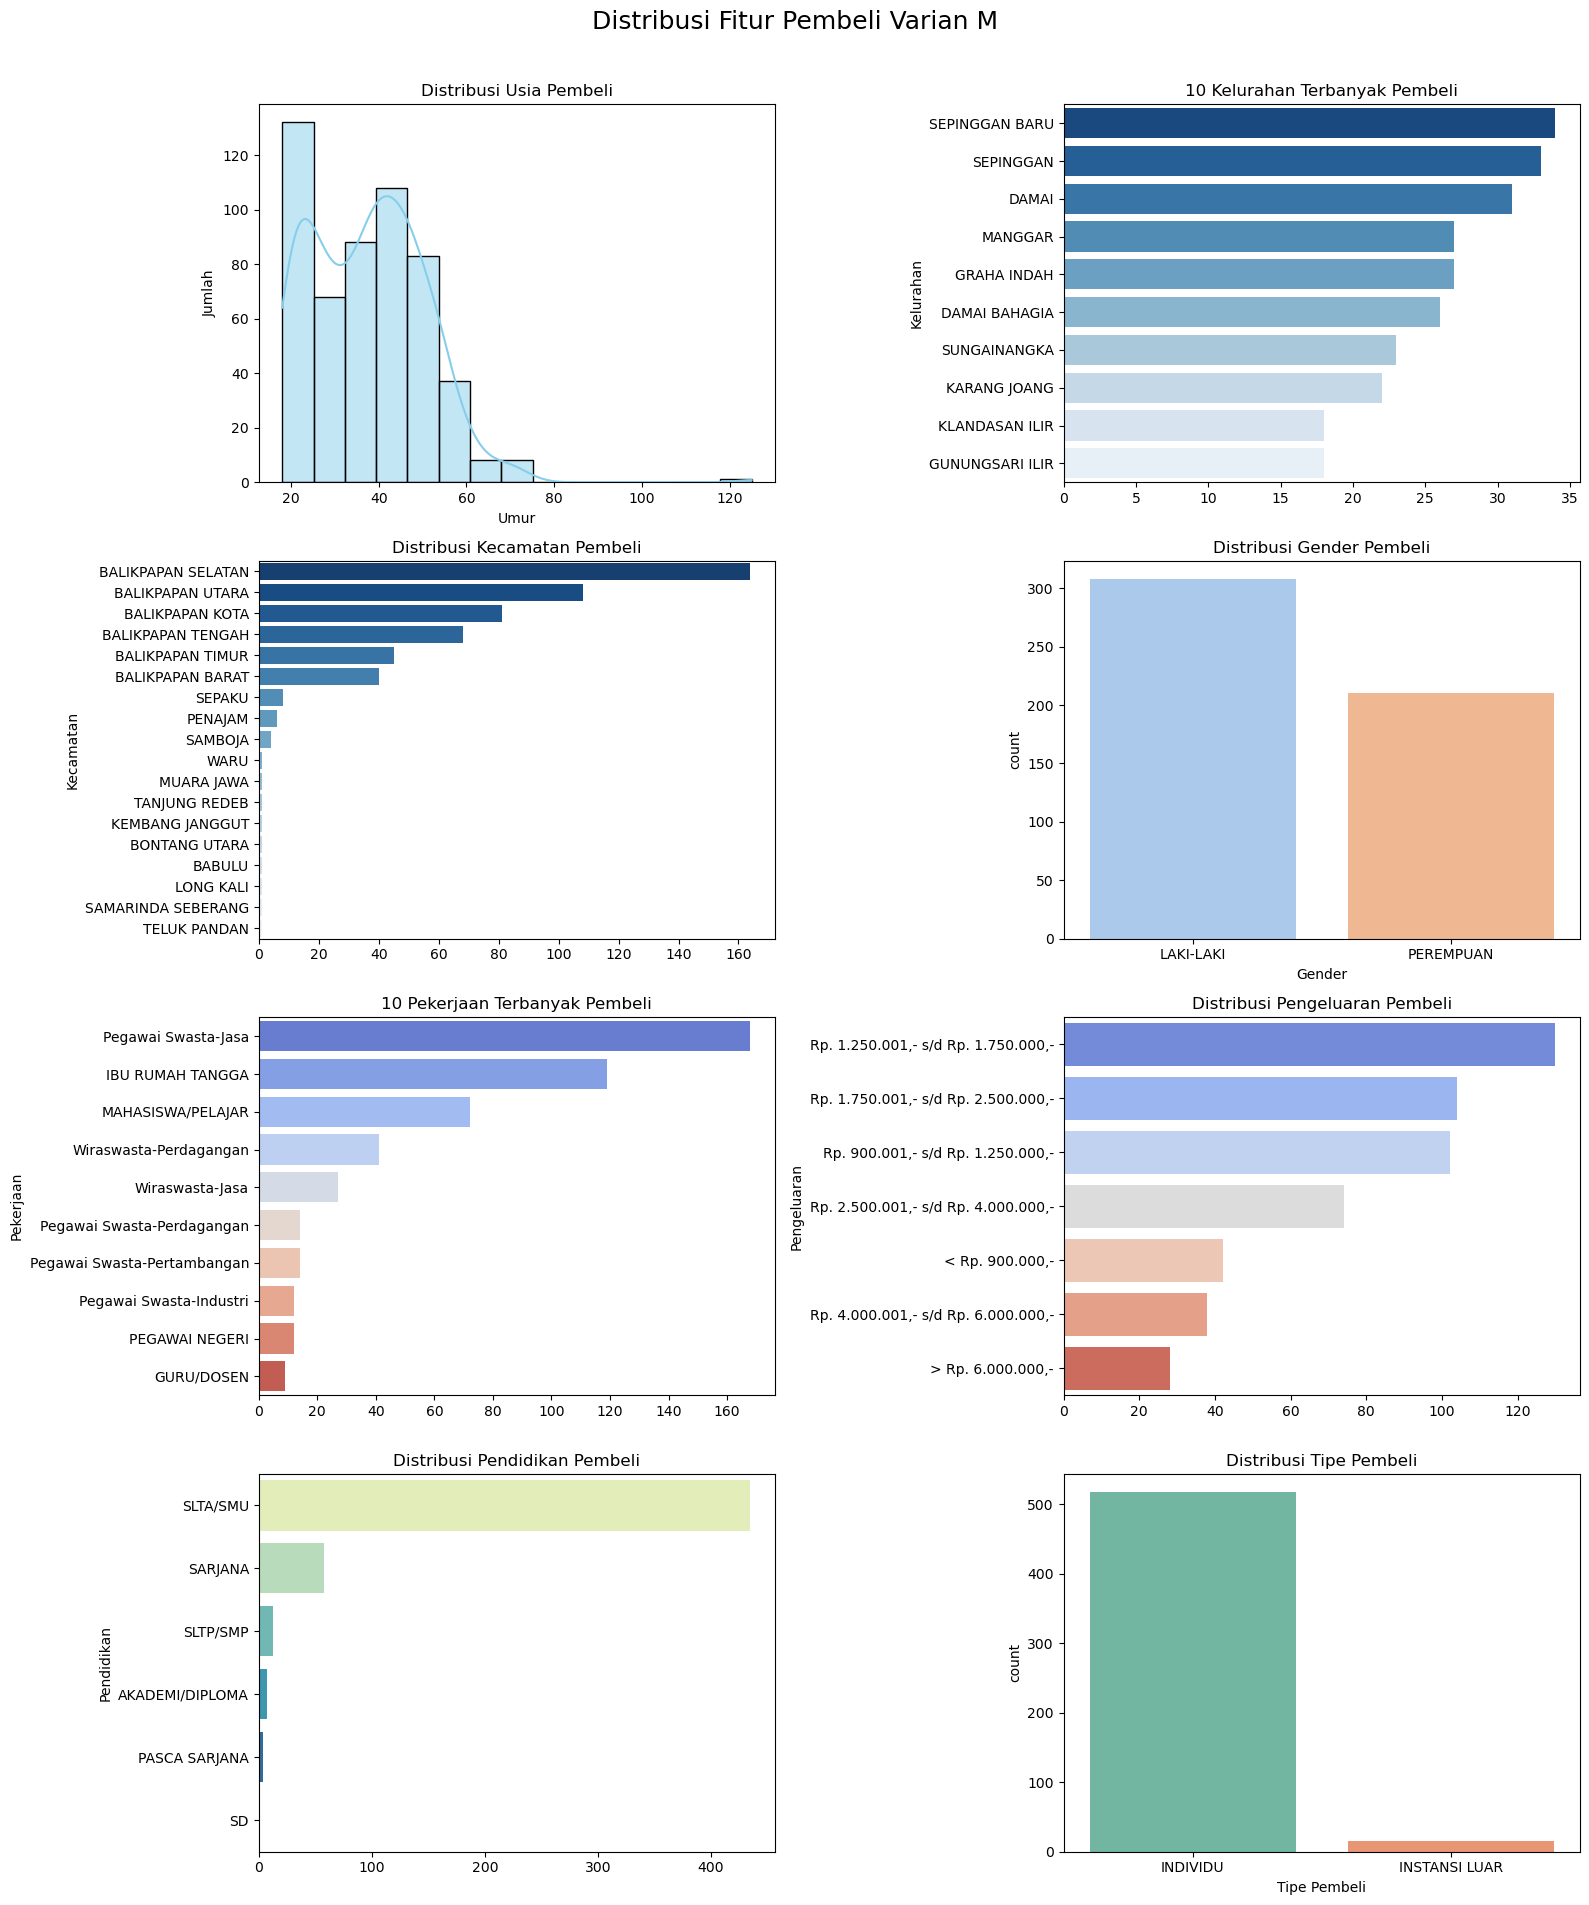

In [6]:
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle("Distribusi Fitur Pembeli Varian M", fontsize=18)

# 1. Umur
sns.histplot(df_M_count["Umur"], bins=15, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Distribusi Usia Pembeli")
axes[0, 0].set_xlabel("Umur")
axes[0, 0].set_ylabel("Jumlah")

# 2. Kelurahan
top_kelurahan = df_M_count['Kelurahan'].value_counts().nlargest(10)
sns.barplot(x=top_kelurahan.values, y=top_kelurahan.index, ax=axes[0, 1], palette='Blues_r')
axes[0, 1].set_title("10 Kelurahan Terbanyak Pembeli")

# 3. Kecamatan
top_kecamatan = df_M_count['Kecamatan'].value_counts()
sns.barplot(x=top_kecamatan.values, y=top_kecamatan.index, ax=axes[1, 0], palette='Blues_r')
axes[1, 0].set_title("Distribusi Kecamatan Pembeli")

# 4. Gender
sns.countplot(data=df_M_count, x="Gender", ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title("Distribusi Gender Pembeli")

# 5. Pekerjaan
top_jobs = df_M_count['Pekerjaan'].value_counts().nlargest(10)
sns.barplot(x=top_jobs.values, y=top_jobs.index, ax=axes[2, 0], palette='coolwarm')
axes[2, 0].set_title("10 Pekerjaan Terbanyak Pembeli")

# 6. Pengeluaran
pengeluaran_order = df_M_count['Pengeluaran'].value_counts().sort_values(ascending=False)
sns.barplot(x=pengeluaran_order.values, y=pengeluaran_order.index, ax=axes[2, 1], palette='coolwarm')
axes[2, 1].set_title("Distribusi Pengeluaran Pembeli")

# 7. Pendidikan
pendidikan_order = df_M_count['Pendidikan'].value_counts()
sns.barplot(x=pendidikan_order.values, y=pendidikan_order.index, ax=axes[3, 0], palette='YlGnBu')
axes[3, 0].set_title("Distribusi Pendidikan Pembeli")

# 8. Tipe Pembeli
sns.countplot(data=df_M_count, x="Tipe Pembeli", ax=axes[3, 1], palette='Set2')
axes[3, 1].set_title("Distribusi Tipe Pembeli")

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


### Jenis-jenis Fitur
fitur numerik :
- umur 

fitur kategorikal :
1. nominal, tidak memiliki urutan atau ranking
2. ordinal, memiliki urutan atau ranking
- kelurahan (nominal)
- kecamatan (nominal)
- gender (nominal)
- pekerjaan (nominal)
- pengeluaran (ordinal)
- pendidikan (ordinal)
- tipe pembeli (nominal)

korelasi yang digunakan terhadap fitur initial varian (kategorikal)
- umur → Spearman
- kelurahan → Chi-Square
- kecamatan → Chi-Square
- gender → Chi-Square
- pekerjaan → Chi-Square
- pengeluaran → Spearman
- pendidikan → Spearman
- tipe pembeli → Chi-Square

In [7]:
# Uji Spearman
spearman_features = ["Umur", "Pengeluaran", "Pendidikan"]

print("=== Korelasi Spearman ===\n")
for feature in spearman_features:
    # Drop missing
    df_clean = df_M_count[[feature, "cumulative_sum"]].dropna()

    # Spearman correlation
    spearman_corr, p_value = stats.spearmanr(df_clean[feature], df_clean["cumulative_sum"])

    # Interpretasi
    interpretation = "Hubungan lemah atau tidak signifikan"
    if 1 >= spearman_corr >= 0.5:
        interpretation = "Hubungan positif"
    elif -1 <= spearman_corr <= -0.5:
        interpretation = "Hubungan negatif"

    signifikan = "signifikan" if p_value < 0.05 else "tidak signifikan"

    print(f"{feature}:")
    print(f"Spearman (rs): {spearman_corr:.4f}")
    print(f"p-value: {p_value:.4f} ({signifikan})")
    print(f"{interpretation} antara {feature} dan cumulative_sum\n")


=== Korelasi Spearman ===

Umur:
Spearman (rs): -0.0565
p-value: 0.1930 (tidak signifikan)
Hubungan lemah atau tidak signifikan antara Umur dan cumulative_sum

Pengeluaran:
Spearman (rs): 0.0183
p-value: 0.6785 (tidak signifikan)
Hubungan lemah atau tidak signifikan antara Pengeluaran dan cumulative_sum

Pendidikan:
Spearman (rs): 0.0806
p-value: 0.0668 (tidak signifikan)
Hubungan lemah atau tidak signifikan antara Pendidikan dan cumulative_sum



In [8]:
df_M_chi = df_M_count.copy()

# Kategorisasi cumulative_sum berdasarkan quantile)
df_M_chi['cumulative_sum_group'] = pd.qcut(df_M_chi['cumulative_sum'], q=3, labels=['Rendah', 'Sedang', 'Tinggi'])

chi_square_features = ["Kelurahan", "Kecamatan", "Gender", "Pekerjaan", "Tipe Pembeli"]

print("=== Korelasi Chi-Square ===\n")
for feature in chi_square_features:
    # Drop NA agar tabel kontingensi valid
    temp_df = df_M_chi[[feature, 'cumulative_sum_group']].dropna()

    # Tabel kontingensi
    contingency_table = pd.crosstab(temp_df[feature], temp_df['cumulative_sum_group'])

    # Hitung chi-square
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Interpretasi hasil
    signifikan = "signifikan" if p < 0.05 else "tidak signifikan"

    print(f"Fitur: {feature}")
    print(f"Chi-square: {chi2:.4f}")
    print(f"p-value: {p:.4f} ({signifikan})")
    print(f"Degrees of Freedom: {dof}")
    print("-" * 40)


=== Korelasi Chi-Square ===

Fitur: Kelurahan
Chi-square: 175.3304
p-value: 0.0024 (signifikan)
Degrees of Freedom: 126
----------------------------------------
Fitur: Kecamatan
Chi-square: 37.7143
p-value: 0.3032 (tidak signifikan)
Degrees of Freedom: 34
----------------------------------------
Fitur: Gender
Chi-square: 0.8754
p-value: 0.6455 (tidak signifikan)
Degrees of Freedom: 2
----------------------------------------
Fitur: Pekerjaan
Chi-square: 54.4575
p-value: 0.0249 (signifikan)
Degrees of Freedom: 36
----------------------------------------
Fitur: Tipe Pembeli
Chi-square: 0.4005
p-value: 0.8185 (tidak signifikan)
Degrees of Freedom: 2
----------------------------------------
